**Step-1: Import the required Packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Data1: Here we will take the data which follows normal distribution

- Data2: Based on above data we will create a another data by multiplying some value

- So that both data sets have multicollinearity

- The both datasets have some covariance

- Then we will apply PCA

- Will create two new PCs, will check the Covariance matrix again

- So the PCs covariance should be zero

**Step-2: Create the data**

In [6]:
# Will create a data having some multicollinearity
x=np.random.normal(200,10,500)  # mean =200, std=10, no of observations=500
x.mean()

199.23112588374443

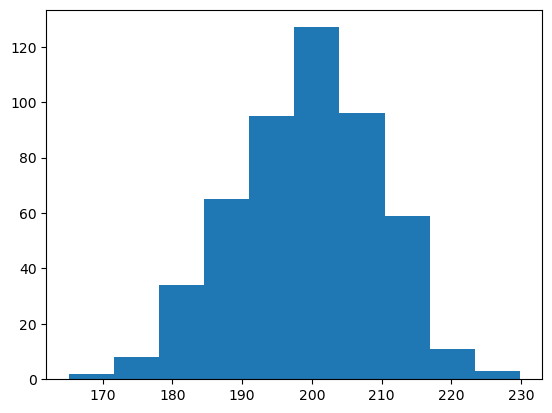

In [8]:
plt.hist(x)
plt.show()

In [10]:
# Create a data y , should be correlate to X
y=0.5*x + np.random.normal(10,5,500)
# we are taking random samples
# and we are adding x data to the samples
print("mean:",y.mean())
print("std:",y.std())

mean: 109.50044609876284
std: 7.35074959683258


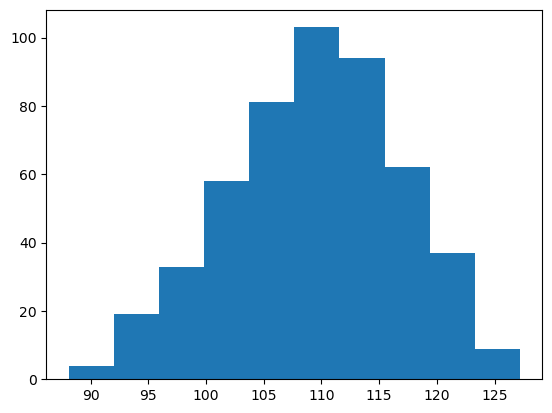

In [12]:
plt.hist(y)
plt.show()

**Step-3: Perform the Scatter Plot**

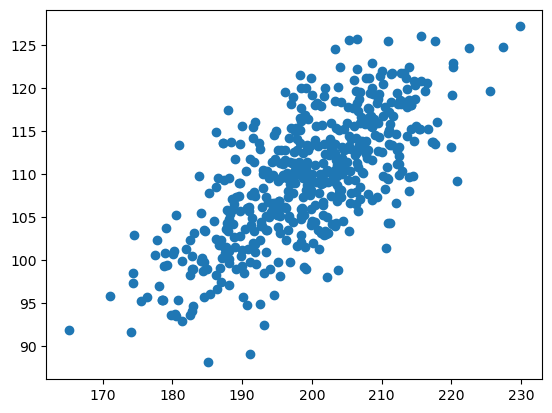

In [15]:
plt.scatter(x,y)
plt.show()

$Observations$

- Both points are correalted each other

- Both points are not orthogonal to each other

- Perform covariance matrix for better idea

**Step-4: Covariance Matrix**

In [19]:
cov_mat=np.cov(x,y)
cov_mat

array([[106.56225907,  53.80739192],
       [ 53.80739192,  54.14180324]])

In [21]:
# variance = 99.03
# variance=x
np.sum(np.square(x-np.mean(x)))/499

106.56225906576532

In [23]:
# cova(x,y)
a=x-np.mean(x)
b=y-np.mean(y)
np.sum(a*b)/499

53.807391918370584

<Axes: >

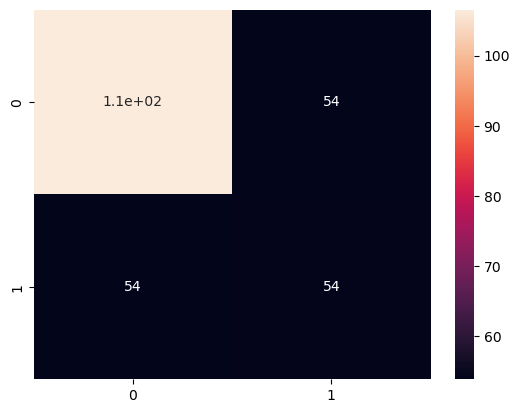

In [25]:
import seaborn as sns
sns.heatmap(cov_mat,annot=True)

**Step-5: Perform the PCA**

- To reduce the dimensions

- To avoid multi collinearity

- To make data has orthogonal

**Will calculate eigen vectors and eigen values of covariance matrix**

In [29]:
from numpy.linalg import eig
eig_values,eig_vectors=eig(cov_mat)

In [31]:
eig_vectors

array([[ 0.84791521, -0.53013187],
       [ 0.53013187,  0.84791521]])

In [33]:
eig_values

array([140.20360985,  20.50045246])

**Obeservations**

- We have two data samples x and y, so we have **2x2 covaraiance matrix**

- When we apply eigen values and eigen vectors on 2x2 cov matrix, will get **two eigen values and two eigen vectors**

- Eigen vectors will give the indicaton to **which direction data should flow**

- If you see eigen vectors the magnitude is same but the direction is different

- The dot product of eigen values either one or zero, indicates **orthogonality**

- Eigen value represnts how much data should flow along that particular direction

**Check point-1**

- Perform the dot product of two eigen vectors

- cos90 is zero

- we are expecting dot product of two eigen vectors is zero

- dot product means cos

- cross product means sin

- dot product : cosine similarity

In [37]:
v1=eig_vectors[0]
v2=eig_vectors[1]
np.dot(v1,v2)

0.0

**Check point-2**

- Data variance along each direction

- Percentage of data flows in each direction

- we will use eigen values , each eigen value divided by sum of the eigen values

In [40]:
eig_values

array([140.20360985,  20.50045246])

In [44]:
140/(140+20), 20/(140+20)

(0.875, 0.125)

In [50]:
print("The variance percentage:",eig_values[0]*100/sum(eig_values))
print("The variance percentage:",eig_values[1]*100/sum(eig_values))

The variance percentage: 87.24335143451636
The variance percentage: 12.756648565483642


**Step-6: Create new PC's data**

new data = old data * eigen vectors

In [54]:
np.vstack([x,y]).T

array([[211.66728423, 116.76618404],
       [207.26223227, 110.15496361],
       [220.02436033, 119.23675465],
       [213.14855968, 118.41714089],
       [204.35093553, 113.14817867],
       [188.45229714, 113.78520788],
       [198.3959092 , 110.59461441],
       [199.98715429, 104.49322541],
       [194.78488598, 106.66158104],
       [191.55857865, 114.24470456],
       [203.35442515, 113.54013153],
       [184.55700135,  99.8081545 ],
       [171.09521788,  95.81843661],
       [197.04428775, 115.32979606],
       [190.8664594 , 101.35140438],
       [177.47892034, 100.66329439],
       [200.9183035 , 103.53516521],
       [197.85265089, 114.16456601],
       [201.57134415, 111.28677602],
       [189.81892191, 100.48061038],
       [209.80991154, 121.41808138],
       [196.14764262, 111.62579975],
       [196.16868288, 112.8455809 ],
       [212.7781645 , 121.83118877],
       [210.81831054, 110.83656314],
       [217.65346249, 125.48755949],
       [182.48259776, 102.33678706],
 

In [56]:
z=np.vstack([x,y]).T  
# stacking means together
# Vertically stacking
# T = Transpose of the data
# X  y
z

array([[211.66728423, 116.76618404],
       [207.26223227, 110.15496361],
       [220.02436033, 119.23675465],
       [213.14855968, 118.41714089],
       [204.35093553, 113.14817867],
       [188.45229714, 113.78520788],
       [198.3959092 , 110.59461441],
       [199.98715429, 104.49322541],
       [194.78488598, 106.66158104],
       [191.55857865, 114.24470456],
       [203.35442515, 113.54013153],
       [184.55700135,  99.8081545 ],
       [171.09521788,  95.81843661],
       [197.04428775, 115.32979606],
       [190.8664594 , 101.35140438],
       [177.47892034, 100.66329439],
       [200.9183035 , 103.53516521],
       [197.85265089, 114.16456601],
       [201.57134415, 111.28677602],
       [189.81892191, 100.48061038],
       [209.80991154, 121.41808138],
       [196.14764262, 111.62579975],
       [196.16868288, 112.8455809 ],
       [212.7781645 , 121.83118877],
       [210.81831054, 110.83656314],
       [217.65346249, 125.48755949],
       [182.48259776, 102.33678706],
 

In [58]:
eig_vectors

array([[ 0.84791521, -0.53013187],
       [ 0.53013187,  0.84791521]])

In [60]:
np.dot([188.53587425,  98.15254732],[0.85632617, -0.51643536])

print(188*0.85)
print(98*0.5)
49+159

159.79999999999998
49.0


208

In [62]:
np.dot([188.53587425,  98.15254732],eig_vectors)

array([211.89622863, -16.72383683])

In [64]:
# dot product of old data and eigen vectors
new_data=np.dot(z,eig_vectors)
new_data

array([[ 2.41377385e+02, -1.32037486e+01],
       [ 2.34137456e+02, -1.64742446e+01],
       [ 2.49773205e+02, -1.55392666e+01],
       [ 2.43508606e+02, -1.25891485e+01],
       [ 2.33255722e+02, -1.23928808e+01],
       [ 2.20112734e+02, -3.42435926e+00],
       [ 2.26852638e+02, -1.14011376e+01],
       [ 2.24967339e+02, -1.74181679e+01],
       [ 2.21705771e+02, -1.28216980e+01],
       [ 2.22990191e+02, -4.68148385e+00],
       [ 2.32618552e+02, -1.15322562e+01],
       [ 2.09400172e+02, -1.32106950e+01],
       [ 1.95870644e+02, -9.45711711e+00],
       [ 2.28216849e+02, -6.66956746e+00],
       [ 2.15568183e+02, -1.52469947e+01],
       [ 2.03851896e+02, -8.73329260e+00],
       [ 2.25248976e+02, -1.87241536e+01],
       [ 2.28284547e+02, -8.08612281e+00],
       [ 2.29912075e+02, -1.24976425e+01],
       [ 2.14218325e+02, -1.54300212e+01],
       [ 2.42268609e+02, -8.27468168e+00],
       [ 2.25492963e+02, -9.33490212e+00],
       [ 2.26157448e+02, -8.31178524e+00],
       [ 2.

In [66]:
new_data=np.dot(z,eig_vectors)
new_data=pd.DataFrame(new_data, columns=['PC1','PC2'])
new_data
# under these two pc2 we will select pc1
# then ML model will devlop on PC1

,PC1,PC2
0,241.377385,-13.203749
1,234.137456,-16.474245
2,249.773205,-15.539267
3,243.508606,-12.589149
4,233.255722,-12.392881
...,...,...
495,212.875193,-23.981785
496,196.180039,-14.532598
497,240.393196,-7.396525
498,206.811207,-11.428526


**Step-7 : Check point-3: Covariance of the new data**

In [69]:
pc1=new_data['PC1'].values
pc2=new_data['PC2'].values
np.cov(pc1,pc2)

array([[1.40203610e+02, 2.58586294e-14],
       [2.58586294e-14, 2.05004525e+01]])

**Step-8: Scatter plot of new PC's data**

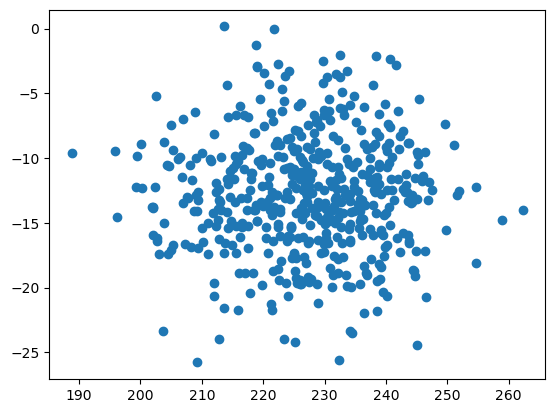

In [72]:
plt.scatter(new_data['PC1'],new_data['PC2'])
plt.show()

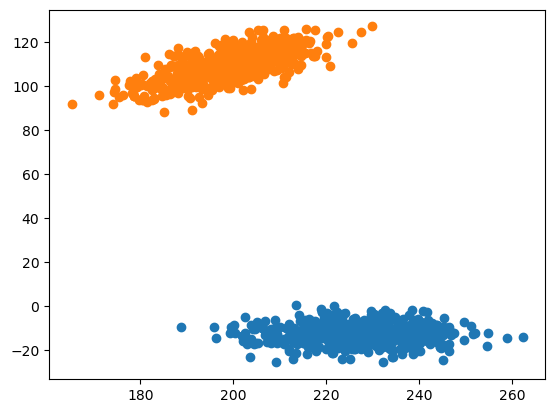

In [74]:
plt.scatter(new_data['PC1'],new_data['PC2']) # Blue no correlation
plt.scatter(x,y) # Orange # Correlation
plt.show()

$Observations$

- we create a new data has two pcs

- The two pcs includes old data

- The two pcs are indepenedent each other

- The variance along PC1 is greater than PC2

- So we can choose only one component i.e. PC1

# Using Package

In [78]:
# Import the packages
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

In [80]:
x=np.random.normal(200,10,500)
y=0.5*x + np.random.normal(10,5,500)
z=np.vstack([x,y]).T 

In [82]:
pca=PCA(n_components=2)
pca.fit(z)

PCA(n_components=2)

In [86]:
pca.transform(z)

array([[ 7.30744927e+00,  2.86483276e+00],
       [-4.99743636e+00, -6.63487802e+00],
       [ 9.23872839e+00,  1.24693527e+00],
       [ 3.77482583e+00, -3.02711044e-01],
       [ 1.01111276e+01, -2.06632896e+00],
       [-2.81352354e+00,  1.13338529e+00],
       [-2.42005595e+00, -5.11682000e+00],
       [ 1.40627668e+00,  6.08745780e+00],
       [ 1.71704936e+01,  7.98345798e+00],
       [ 2.50855768e+01,  2.01067656e+00],
       [ 2.90255597e+00,  4.11285557e-01],
       [ 1.65836075e+01,  4.92282228e+00],
       [ 7.98012905e-01,  2.37115560e+00],
       [-1.00615373e+01, -1.26333279e+01],
       [ 2.02488373e+00, -6.02629983e+00],
       [ 5.19365209e+00,  1.03005769e+01],
       [-4.64020447e+00, -5.91336559e+00],
       [-1.06861374e+01, -5.64249911e+00],
       [-9.18251328e-01,  8.90299630e-01],
       [ 1.89572828e+01, -1.14397637e+00],
       [ 1.42561000e+01,  1.67941355e+00],
       [-1.77196108e+01, -3.15611153e+00],
       [ 1.27630671e+01,  1.95642956e+00],
       [-1.

$Explained$ $variance$ $ratio$

- Explained variance ratio means variance percentage in each axis

In [90]:
pca.explained_variance_ratio_

array([0.88234899, 0.11765101])

$Explained$ $variance$

- It is same as eigen values

In [94]:
pca.explained_variance_

array([141.94861438,  18.92720288])

In [96]:
141.94861438/(141.94861438+20)

0.8765040375518649

Step-1: Covariance matrix of data

Step-2: We will calculate Eigen vectors and Eigen values

Step-3: Eigen vector will give the direction

Step-4: Eigen values will give the amount of variance

Step-5: PC1 and PC2 new axis will form based on eigen vectors

Step-6: Var(PC1)>>>var(PC2) : 130.3107954 , 15.61458758

Step-7: 130/(130+15) = 89%

Sklearn package These eigen values is called by explained_variance [126.63714313, 20.0074381 ]

Percentage of variance : 126/126+20= by explalined variance ratio

# Perform on data

In [114]:
#Read the data
data=pd.read_csv(r"C:\Users\Dell\OneDrive\Nareshit\DataScienceandAI\Datafiles\winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [116]:
# If drop duplicates are there
data=data.drop_duplicates()
data=data.reset_index(drop=True)

In [118]:
X=data.drop('quality',axis=1)

- Total there are 12 columns

- 11 columns are input

- 1 column output

- we need to apply PCA on 11 columns

- PCA also gives 11 pc's, buy we can choose less features which covers maximum variance

- Here we are choosing 6 PCs

In [121]:
from sklearn.decomposition import PCA
pca=PCA(n_components=6)
pca.fit(X)

PCA(n_components=6)

In [123]:
pca_data=pca.transform(X)  # Input data
len(pca_data[0]),len(pca_data)

# Original data has 1359 rows
# Original data has 11 columns is converted into 6 columns
# Thats why we each tuple 6 values are there

(6, 1359)

In [127]:
# 6 pcs consider as input columns

new_data=pd.DataFrame(pca_data,columns=['PC1','PC2','PC3','PC4','PC5','PC6'])

In [129]:
# We need to add output column also
new_data['quality']=data['quality']
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,quality
0,-13.570072,-2.017568,-1.094066,-0.559080,-1.047442,0.200026,5
1,21.666123,4.557096,-0.302453,-0.204069,-0.555065,0.304031,5
2,6.819231,-2.412797,-0.562693,-0.294265,-0.535776,0.205776,5
3,13.086422,-1.826478,2.720394,-1.427526,0.026329,-0.087442,6
4,-7.281696,-1.354853,-1.082471,-0.704168,-0.969017,0.179091,5
...,...,...,...,...,...,...,...
1354,-6.007602,13.733687,-1.305231,-0.664744,-1.095736,-0.051888,6
1355,0.708711,16.377059,-1.842772,-0.246504,-0.199464,0.060070,5
1356,9.047555,21.724455,-1.982276,0.072204,0.416863,-0.035230,6
1357,0.712404,16.379591,-2.120391,-0.266366,-0.514732,-0.010062,5


In [131]:
pca.explained_variance_ratio_
# 6 pcs has different variances
# first variance has 0.94, which means 94%

array([9.48131404e-01, 4.70453586e-02, 2.49369556e-03, 1.40235695e-03,
       8.54515616e-04, 3.47852959e-05])

In [133]:
np.sum(pca.explained_variance_ratio_)
# the sum of 6pcs comonent variance almost covers =100%
# so we can choose 6 components

0.9999621157467505

In [135]:
pca.explained_variance_

array([1.16757376e+03, 5.79338752e+01, 3.07085442e+00, 1.72692854e+00,
       1.05229086e+00, 4.28362552e-02])